1. Installing the necessary libraries

In [21]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install joblib
!pip install seaborn
!pip install scikit-learn
!pip install streamlit


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Importing the Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import joblib

3. Loading the dataset

In [23]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\youth_resilience_data.csv')

4. Printing the first few rows of the dataset

In [24]:
print(df.head())

   Age  Gender EducationLevel  ... ResilienceScore  SocialSupportRating  Benefit
0   21    Male      Secondary  ...               7                    7        0
1   18  Female      Secondary  ...              23                    1        0
2   27    Male      Secondary  ...              91                    3        1
3   29    Male      Secondary  ...              40                    7        0
4   25  Female      Secondary  ...              35                    5        0

[5 rows x 8 columns]


5. Printing data info

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        500 non-null    int64 
 1   Gender                     500 non-null    object
 2   EducationLevel             500 non-null    object
 3   EmploymentStatus           500 non-null    object
 4   BaselineMentalHealthScore  500 non-null    int64 
 5   ResilienceScore            500 non-null    int64 
 6   SocialSupportRating        500 non-null    int64 
 7   Benefit                    500 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 31.4+ KB
None


6. Data Preprocessing

6.1 Checking for Missing values

In [26]:
print(df.isnull().sum())

Age                          0
Gender                       0
EducationLevel               0
EmploymentStatus             0
BaselineMentalHealthScore    0
ResilienceScore              0
SocialSupportRating          0
Benefit                      0
dtype: int64


6.2 Encoding categorical variables

In [27]:
df = pd.get_dummies(df, drop_first=True)

6.3 Seperating Features and Target

In [28]:
X = df.drop('Benefit', axis=1)
y = df['Benefit']

6.4 Train-Test Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

6.5 Scaling numeric features

6.5.1 Creating Scaler Instance

In [30]:
scaler = StandardScaler()

6.5.2 Fit on training data and transform

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

6.5.3 Transform test data

In [32]:
X_test_scaled = scaler.transform(X_test)

7. Training the Model

7.1 Building the Model

In [34]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

7.2 Fitting the model

In [35]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

8. Evaluating the Model

8.1 Classification Report

In [37]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print('Classofication Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_prob))

Classofication Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.86      0.78      0.82        49

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

ROC AUC Score: 0.9415766306522608


8.2 Confusion Matrix

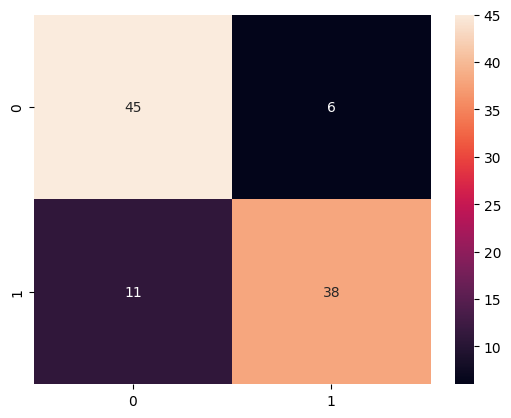

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

9. Saving the model n Scaler

In [39]:
joblib.dump(model, 'Youth_Resilience_Model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print('Model and Scaler Saved!')

Model and Scaler Saved!
